# Motivations

By following the steps in this exercise, you will practice making some plots of near-real time ocean data from a Seaglider and share a little about your interests with your lab group and instructors.  The reasons this activity is relevant to EOS1505 is:

1. The types of plots made here are similar to the reading for next week.  This data is real-world context!
2. You will be able to use this notebook to check on the Seaglider occasionally, which will culminate in a project.  The code here can be reused as starter code for your project. (Don't forget to reference it if you use it!)
3. You have the chance to practice using the `Blackboard link ->  GitHub Classroom -> HPC Grid -> PDF to Blackboard` workflow used for **some** (but not all) of the assignments in this class.  By completing this assignment, you can verify you have access to all the necessary resources and you can see exactly the same process for submitting other assingments.


# Instructions

1. Accept this assignment in GitHub Classroom.
2. Download this file to the Bowdoin HPC grid by typing the following into the terminal where `<your_username>` (including the angle braces) is replaced by your github username:
```bash
git clone https://github.com/Bowdoin-EOS1505-S21/HW01-intro-<your_username>.git
```
3. Open the notebook via the JupyterHub interface.
4. Answer the questions at the beginning of this assignment by typing into the cells as indicated.  If you are comfortable sharing your answers with your lab group, these questions will be a good way to get to know your peers.
5. Run the code cells at the end of the notebook to make plots.
6. Save your answers by clicking on the floppy disk image in the upper left corner.
7. Save the assignment as a `.pdf` by clicking on the menu items: `File`->`Download as`->`PDF via Latex (.pdf)`.  If that doesn't work, use your web browser's print to `.pdf` functionality to create a `.pdf` of your notebook.
8. Upload the `.pdf` to Blackboard.
9. ***(Optional)*** Upload your assignment back to GitHub for potential sharing with peers with the following terminal commands (\#-prefixed text are comments describing each line):

```bash
cd HW01-intro-<your_username>.git   # Change into the repository directory
git add .                           # Stage the changes you've made -> take a snapshot
git commit -m "Short message here"  # Commit your changes, including a short description in quotes
git push origin                     # Push changes back up to GitHub
```

## Some details when using `git commit`.

**Skip this section if you don't plan on pushing commits back to GitHub.  You can always change your mind later.**

If you choose to use `git commit` you'll need to first tell git who you are.
It needs to know your name and email.  In this repository, the `git_setup.sh`
will prompt you for this information and you'll be all set up.  To run the
script, at the terminal prompt, enter:

```bash
./git_setup.sh
```

If you don't want to provide your actual e-mail, it will still work if you
enter any text at all (just no spaces or non-alphabetical characters). 
For example, `aaa` works too!

If you choose to use `git commit` without the `-m` option, you will 
need to enter text to describe the changes you made using the vi text 
editor.  To do this,

1. press `a` to enter edit mode and add text,
2. type a short description of your changes,
3. press `Esc` to get out of edit mode,
4. type `:w` to save your changes to the commit file, and
5. type `:q` to quit vi.

While vi feels clunky, this basic skill is helpful as vi is present on lots of computer systems, especially the ones used to interact with autonomous underwater vehicles.  The files that control the behavior of these underwater robots are often modified with vi.  Frankly, steps 1-5 above are the only vi commands I know, but [they are enough to pilot a Seaglider 3,400 km](https://phys.org/news/2015-07-robotic-gliders-herald-sea-ocean.html).

***


# Question 1: Why are you taking this class?

Type your answer in this Markdown cell.

# Question 2: What is currently your favorite fact about the ocean?

Type your answer in this Markdown cell.

# Question 3: What are some aspects about the ocean you want to learn about?

Type your answer in this cell.  You may want to experiment with making a list using `+` or `-` signs and or numbers `1. `!

# Question 4: What are some potential challenges you think may be in this course?

Type your answer in this cell.

# Question 5: What is your EOS/math/science/programming background?

Type your answer in this cell.

# Some first Python code and plots

Everything below this line is *optional* after you have completed the Prelab assignment.  This content will be part of synchronous Lab.

***

## Step 1: Import libraries

In [1]:
# Note that this type of cell is a "Code" cell, 
# selected in the drop down menu above.  The other
# cells so far in this notebook are "Markdown" cell
# types.  All lines that begin with # are comments
# and effectively ignored by the computer.

# Python code often starts with the importing of
# libraries: additional code that is available for
# use but you need to tell this notebook you want it.
# Libraries are a great way to organize and streamline
# code.  Some of them are really big and complicated
# and others are small.  For an example of a small
# library, the code in  load_glider_data is actually
# in this repository (see the .py file). If a block of 
# code is used multiple times, instead of copying the 
# code many times throughout the notebook, it can be
# defined once and (re)used elsewhere.  For our 
# purposes here, you don't need to understand how this 
# external code works but you'll want to use it below. 

#=================================================================
# Give the notebook access to some useful plotting
# tools.  Matplotlib is a library of plotting tools.
# One particular aspect of Matplotlib is being
# imported here and it is given a shorthand name
# (i.e. an alias or shortcut) as "plt" to simplify
# coding later.
import matplotlib.pyplot as plt

#=================================================================
# Same thing here for three other useful libraries,
# Pandas, Numpy, and load_glider_data.  We'll go over 
# what do in more detail as needed.
import pandas as pd
import numpy as np
import load_glider_data as sg

## Step 2: Temperature and salinity plots!

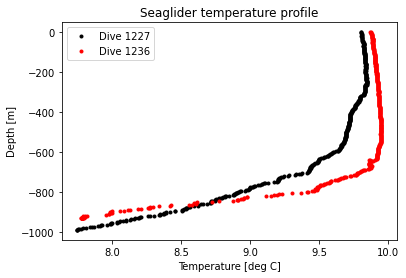

In [2]:
# Load the data from dive 1227.
# de = depth [m]
# te = temperature [deg C]
# sa = salinity [g salt/kg seawater = "per mil"]
# th = potential temperature (temperature corrected for compressibility)
# s0 = potential density anomaly (density corrected for compressibility, subtract 1000 kg/m^3)
de, te, sa, th, s0 = sg.load_hb_profile('605','1227')

# These lines are a template for making an x,y plot.
# Start by initializing an axis.
fig, ax = plt.subplots()

# Next plot the data.  You can change the
# line type and color by changing the
# elements in 'k.-'.  Try b, g, r instead
# of k!
ax.plot(te,-1*de,'k.')

# It's really important to label the plot
ax.set_xlabel('Temperature [deg C]')
ax.set_ylabel('Depth [m]')
ax.set_title('Seaglider temperature profile')

# You can overlay and label additional data
# as needed.
de, te, sa, th, s0 = sg.load_hb_profile('605','1236')
ax.plot(te,-1*de,'r.')
ax.legend(['Dive 1227','Dive 1236'])

Text(0.5, 1.0, 'Seaglider density profile')

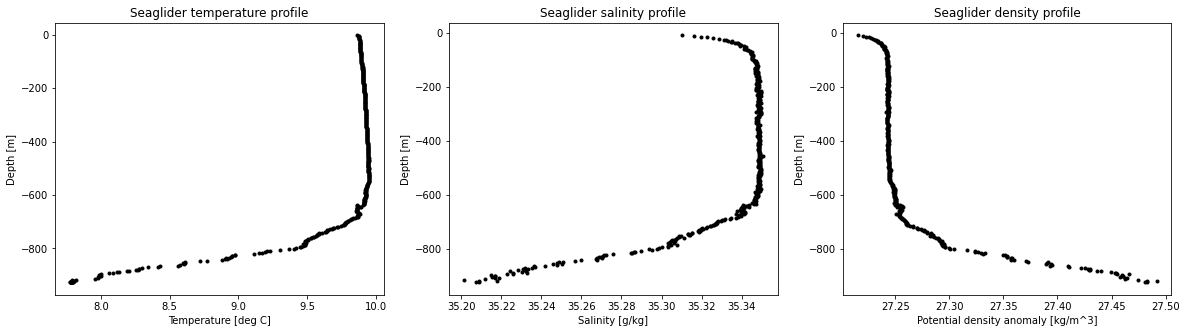

In [3]:
# Cool!  But what about salinity and density?
# Here is a template for making plot subpanels.
# Note that there is no need to reload the data;
# variables are automatically transferred from
# cell-to-cell.
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(20,5))

ax0.plot(te,-1*de,'k.')
ax0.set_xlabel('Temperature [deg C]')
ax0.set_ylabel('Depth [m]')
ax0.set_title('Seaglider temperature profile')

ax1.plot(sa,-1*de,'k.')
ax1.set_xlabel('Salinity [g/kg]')
ax1.set_ylabel('Depth [m]')
ax1.set_title('Seaglider salinity profile')

ax2.plot(s0,-1*de,'k.')
ax2.set_xlabel('Potential density anomaly [kg/m^3]')
ax2.set_ylabel('Depth [m]')
ax2.set_title('Seaglider density profile')

## Step 3: Maps!

[[ 56.692  -7.173 230.   ]
 [ 56.69   -7.177 230.   ]
 [ 56.688  -7.178 228.   ]
 ...
 [ 56.789  -6.822 182.   ]
 [ 56.791  -6.822 185.   ]
 [ 56.794  -6.822 190.   ]]


Text(0.5, 1.0, 'Seaglider track')

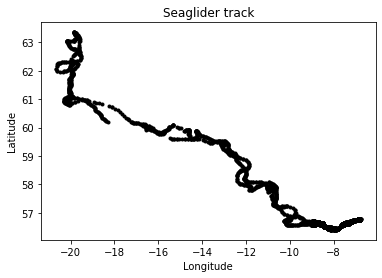

In [4]:
# This command reads the file at the given location
# (in this case, in our class data directory on the
# HPC grid) and puts that data into the python variable
# glider_xyd.  I called it _xyd because it has longitude,
# latitude, and depth.
glider_xyd = np.loadtxt('/mnt/courses/eos1505/sg545/sg545_m03.xyd.csv',delimiter=',')

# And here you can preview the data to make certain it
# is what you think it is.
print(glider_xyd)


# (Later, we can use nearly the same code to
# made side-by-side plots.)
fig, ax = plt.subplots()


ax.plot(glider_xyd[:,1],glider_xyd[:,0],'k.')

# It's always important to label your plots.
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Seaglider track')

Text(0.5, 1.0, 'Seaglider depth soundings')

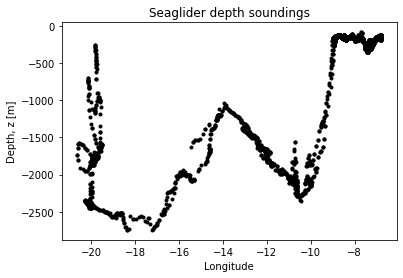

In [5]:
# That was nice, let's get a view of the seafloor
# features that we need to steer around!
fig, ax = plt.subplots()

# Next plot our data.  You can change the
# line type and color by changing the
# elements in 'k.-'.  Try b, g, r instead
# of k!
ax.plot(glider_xyd[:,1],-1.0*glider_xyd[:,2],'k.')
ax.set_xlabel('Longitude')
ax.set_ylabel('Depth, z [m]')
ax.set_title('Seaglider depth soundings')

(50.0, 65.0)

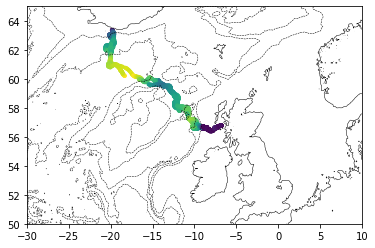

In [6]:
# Cool!  Now, let's put these soundings in the
# context of large scale topographic features.

# Load the global topography data set and store 
#  as a Python variable. (Detailed explanation 
# for why it is this way is optional and below,
# the condensed version is here.)
#(error_value, error_message) = pyferret.run(
#    'use /mnt/courses/eos2680/ETOPO1/topo_tenthdeg_ice_gline.nc')
#lon = np.squeeze(pyferret.getdata('lon1',False)['data'])
#lat = np.squeeze(pyferret.getdata('lat1',False)['data'])
#topo = np.squeeze(pyferret.getdata('z1',False)['data'])
#[y,x] = np.meshgrid(lat,lon)

x,y,topo = sg.load_topo()

fig, ax = plt.subplots()
#ax.pcolormesh(x,y,topo,shading='auto',cmap='Spectral')
ax.contour(x,y,topo,
    [-4000,-3000,-2000,-1000,0],
    colors='black',
    linewidths=0.5)

ax.scatter(glider_xyd[:,1],glider_xyd[:,0],10,glider_xyd[:,2])

ax.set_xlim(-30,10)
ax.set_ylim(50,65)



# Example of a deliberate mistake

In [7]:
# Jupyter notebooks will also save error
# messages!  If you have trouble, save
# your notebook as it is and share with
# your instructor or colleague for help
# debugging.  Maybe you can figure out
# what's wrong; look for clues in the
# bottom line of the error message!

copy_of_x = a

NameError: name 'a' is not defined

# More details on the steps for loading data

***Optional:*** You are welcome to look at the `load_glider_data.py` file that is distributed with this notebook.  The code in this file is loaded at the beginning of the notebook for your use through out the notebook.